### Import Library

In [53]:
import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

### Declare PATH for TRAIN AND TEST

In [2]:
DATA_DIR = "/Users/soumilshah/IdeaProjects/mytensorflow/Dataset/training_set"
c = ['cats','dogs']
IMAGE_SIZE = 50

### Load dataset

In [3]:

def create_training_data():
    training_date = []
    for categories in CATERGORIES:
        path = os.path.join(DATA_DIR,categories)
        class_num = CATERGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                training_date.append([new_array,class_num])
            except:
                pass
    return training_date

### cnvert list to np ndarray

In [4]:
data = np.asarray(create_training_data())

In [5]:
x_data = []
y_data = []

for x in data:
    x_data.append(x[0])
    y_data.append(x[1])

### Normalize image 

In [7]:
x_data_np = np.asarray(x_data)/255.0
y_data_np = np.asarray(y_data)

### Store the data in pickle file so every time you dont have to load images

In [8]:
pickle_out = open('x_data_np','wb')
pickle.dump(x_data_np,pickle_out)
pickle_out.close()

### Load  the data set which is ND array

In [9]:
pickle_out = open('y_data_np','wb')
pickle.dump(y_data_np,pickle_out)
pickle_out.close()

In [10]:
X_Temp = open('x_data_np','rb')
x_data_np = pickle.load(X_Temp)

Y_Temp = open('y_data_np','rb')
y_data_np = pickle.load(Y_Temp)


In [13]:
x_data_np = x_data_np.reshape(-1, 50, 50, 1)

### Perform train test split

In [14]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_data_np, y_data_np, test_size=0.3,random_state=101)

### create Model

In [18]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=x_data_np.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(75, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.fit(x_data_np, y_data_np, batch_size=32, epochs=3, validation_split=0.3)
model.save('64x3CNN.model')

Train on 5600 samples, validate on 2400 samples
Epoch 1/3
5600/5600 [==============================] - 77s 14ms/sample - loss: 0.5451 - acc: 0.7302 - val_loss: 1.1338 - val_acc: 0.1667
Epoch 2/3
5600/5600 [==============================] - 83s 15ms/sample - loss: 0.5241 - acc: 0.7412 - val_loss: 1.2527 - val_acc: 0.2037
Epoch 3/3
5600/5600 [==============================] - 81s 14ms/sample - loss: 0.5101 - acc: 0.7586 - val_loss: 1.2545 - val_acc: 0.2233


# Test

In [32]:
def prepare(filepath):
    training_date = []
    
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
    new_image =  new_array.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
    return new_image

In [33]:
model = tf.keras.models.load_model('64x3CNN.model')

### Lets give a image to Test from internet which network has never seen

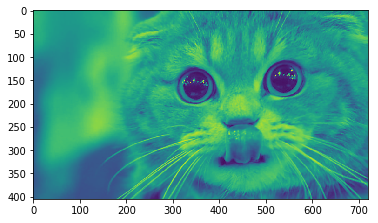

In [69]:
filepath = '/Users/soumilshah/Downloads/abcat.jpg'
img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array)

In [41]:
test = model.predict([prepare(filepath='/Users/soumilshah/Downloads/abcat.jpg')])

In [42]:
print(CATERGORIES[int(test[0][0])])

cats


# It Says its a Cat